In [2]:
# ! pip install dask leidenalg xgboost  composition_stats igraph colorcet dask
# ! pip install tysserand libpysal geopandas scipy napari
# ! pip install opencv-python
# ! pip install "dask[distributed]"

In [3]:
import sys

path_src = '../../../src/'
sys.path.append(path_src)
import importlib
import SpatialAnalysis as SpAn
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

import numpy as np
# import networkx as nx
# from scipy.spatial import distance
# from sklearn.neighbors import NearestNeighbors
# from scipy.stats import entropy
import os
import importlib


Script loaded!


Script loaded!


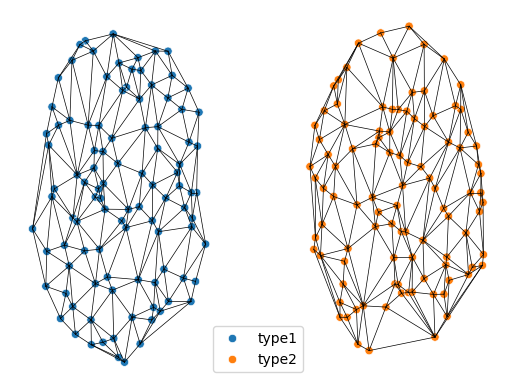

,x,y,phenotype
43,6.042905,11.731804,type1


In [4]:
thr = 5
importlib.reload(SpAn)
coords_path = '../../../data/4_Clusters_Detection/4_1_Isolated_Clusters/Isolated_coords.csv'
nodes_path = '../../../data/4_Clusters_Detection/4_1_Isolated_Clusters/Isolated_nodes.csv'
phenotype_path = '../../../data/4_Clusters_Detection/4_1_Isolated_Clusters/Isolated_phenotype.csv'
expression_path = '../../../data/4_Clusters_Detection/4_1_Isolated_Clusters/Isolated_expression.csv'

coords = pd.read_csv(coords_path,sep=',',index_col=0)
nodes = pd.read_csv(nodes_path,sep=',',index_col=0)
phenotype = pd.read_csv(phenotype_path,sep=',',index_col=0)
expression = pd.read_csv(expression_path,sep=',',index_col=0)

types = [item for sublist in phenotype.values for item in sublist]
edges = SpAn.delaunay_edges(coords)
edges = SpAn.trim_edges_by_distance(coords, edges, thr )
SpAn.plot_network(coords, edges, types = types, linewidth = .5)

nodes.sample()

# DeepST

In [13]:
# ! pip uninstall numpy -y
! pip install leidenalg
# ! pip install numpy==1.23.5
#  torchaudio==0.13.0+cpu pyg_lib==0.3.1+pt113cpu

  Using cached leidenalg-0.10.2-cp38-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (10 kB)
Using cached leidenalg-0.10.2-cp38-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (2.0 MB)


In [15]:
import DeepST as DST
importlib.reload(DST)
config = { "pre_epochs": 400,  "epochs": 500,  "use_gpu": 0, "Conv_type": "GCNConv" }


# Example of calling the function
DST.run_deepst(
    coordinates = '../../../data/4_Clusters_Detection/4_1_Isolated_Clusters/Isolated_coords.csv',
    features = '../../../data/4_Clusters_Detection/4_1_Isolated_Clusters/Isolated_expression.csv',
    observations = '../../../data/4_Clusters_Detection/4_1_Isolated_Clusters/Isolated_phenotype.csv',
    out_dir="../../../data/intermediate/DST",
    n_clusters=5,
    technology="Visium",
    seed=42,
    matrix = '../../../data/4_Clusters_Detection/4_1_Isolated_Clusters/Isolated_expression.csv',
    neighbors=None,
    config=config
)

/home/abdelmounim.essabbar/anaconda3/envs/DeepST/lib/python3.9/site-packages/anndata/_core/aligned_df.py:67: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


/home/abdelmounim.essabbar/Projects/Spatial-Omics-Networks-Benchmark-/pipelines/4 - Clusters Detection/4 - 1 - Simulation Data
Your task is in full swing, please wait


DeepST trains an initial model: 100%|██████████ [ time left: 00:00 ]
DeepST trains a final model:   0%|           [ time left: ? ]/home/abdelmounim.essabbar/anaconda3/envs/DeepST/lib/python3.9/site-packages/torch/nn/functional.py:2916: UserWarning: reduction: 'mean' divides the total loss by both the batch size and the support size.'batchmean' divides only by the batch size, and aligns with the KL div math definition.'mean' will be changed to behave the same as 'batchmean' in the next major release.
  warnings.warn(
DeepST trains a final model: |           [ time left: 00:00 ]    


Step 3: DeepST training has been Done!
Current memory usage：0.6519 GB
Total time: 0.29 minutes
Your task has been completed, thank you
Of course, you can also perform downstream analysis on the processed data
Best resolution:  0.30999999999999994


,label
0,3
1,3
2,3
3,3
4,1
...,...
195,0
196,0
197,0
198,2


# Giotto

In [1]:
import subprocess
import pandas as pd
import os
# Run the R script using subprocess
r_script = '../../../src/Giotto.R'

# Define the paths to your files and the output directory
coordinates_file = '../../../data/4_Clusters_Detection/4_1_Isolated_Clusters/Isolated_coords.csv'
matrix_file = '../../../data/4_Clusters_Detection/4_1_Isolated_Clusters/Isolated_expression.csv'
features_file = '../../../data/4_Clusters_Detection/4_1_Isolated_Clusters/Isolated_expression.csv'
observations_file = '../../../data/4_Clusters_Detection/4_1_Isolated_Clusters/Isolated_phenotype.csv'
config_file = '../../../data/4_Clusters_Detection/4_1_Isolated_Clusters/Giotto_config.csv'
out_dir = "../../../data/4_Clusters_Detection/4_1_Isolated_Clusters/Giotto_output"


config = {
    "beta": 10,
    "k": 10,
    "dims_used": 20,
    "matrix": "counts",
    "integrated_feature_selection": 0,
    "image": 0,
    "neighbors": 0,
    "config_file": 1
}
config_df = pd.DataFrame(list(config.items()), columns=["Parameter", "Value"])
config_df.index = config_df.iloc[:,0]
config_df.T.iloc[1:,:].to_csv(config_file)

# Define the number of clusters and technology
n_clusters = 10
technology = "Visium"
seed = 1234

# Construct the command
command = [
    "Rscript",
    r_script,
    "--coordinates", coordinates_file, #1
    "--matrix", matrix_file, #2
    "--features", features_file, #3
    "--observations", observations_file, #4
    "--out_dir", out_dir, #5
    "--config", config_file,
    "--n_clusters", str(n_clusters),
    "--technology", technology,
    "--seed", str(seed),
]


result =  subprocess.run(command)


# Print the output and error (if any)
print("STDOUT:")
print(result.stdout)
print("STDERR:")
print(result.stderr)


[1] "R script Loaded"


Newer devel version of GiottoUtils on GitHub: 0.1.10


STDOUT:
None
STDERR:
None


Warning messages:
1: package ‘jsonlite’ was built under R version 4.3.3 
2: package ‘MatrixGenerics’ was built under R version 4.3.3 
3: package ‘GenomicRanges’ was built under R version 4.3.3 
4: package ‘S4Vectors’ was built under R version 4.3.3 
5: package ‘IRanges’ was built under R version 4.3.3 
6: package ‘Biobase’ was built under R version 4.3.3 
Error in file(file, "rt") : cannot open the connection
Calls: read.csv -> read.table -> file
In addition: Warning message:
In file(file, "rt") :
  cannot open file '--coordinates': No such file or directory
Execution halted
